# Context
This is a dataset from one bank in the United States. Besides usual services, this bank also provides car
insurance services. The bank wants to organizes regular campaigns to attract new clients and has potential
customers’ data.

# Problems
The bank need a help to efficiently approaching potential customers.

# Goals
To build a classification model to predict new customers whether they will buy car insurance or not. 
The model will focus on reducing the error of predicting 0 or not buying but actual buying.

Feature              Description
Id:                  Unique ID number  
Age:                 Age of the client  
Job :                Job of the client.  
Marital :            Marital status of the client  
Education:           Education level of the client  
Default:             Has credit in default?  
Balance:             Average yearly balance, in USD  
HHInsurance:         Is household insured  
CarLoan:             Has the client a car loan  
Communication:       Contact communication type  
LastContactMonth:    Month of the last contact  
LastContactDay:      Day of the last contact  
CallStart:           Start time of the last call(HH:MM:SS)  
CallEnd :            End time of the last call  
NoOfContacts:        Number of contacts performed during this  
DaysPassed:          Number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means
                    clientwas notpreviously contacted)  
PrevAttempts:        Number of contacts performed before this campaign and for this client  

In [1]:
# import common packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read Data

df = pd.read_csv('Insurance.csv')

In [5]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [6]:
df.info()

# Quick glance at the data information
# the data has 4000 rows and 19 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [7]:
# Data description

dfDesc = []

for i in df.columns:
    dfDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        ((df[i].isna().sum())/len(df) *100).round(2),
        df[i].nunique(),
        df[i].unique()
    ])
pd.DataFrame(data = dfDesc, columns = ['Features', 'D types', 'Null', 'Null%', 'Unique', 'Unique Value'])

# We have several features with Nan Values
# the Outcome features has 76% nan values and communication has 22.6% nan values the rest is below 5% Nan Values
# I will take a look at the outcome feature first and decide what to do with the missing values

,Features,D types,Null,Null%,Unique,Unique Value
0,Id,int64,0,0.00,4000,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Age,int64,0,0.00,70,"[32, 29, 25, 30, 37, 35, 27, 53, 44, 38, 61, 3..."
2,Job,object,19,0.48,11,"[management, blue-collar, student, technician,..."
3,Marital,object,0,0.00,3,"[single, married, divorced]"
4,Education,object,169,4.23,3,"[tertiary, primary, secondary, nan]"
5,Default,int64,0,0.00,2,"[0, 1]"
6,Balance,int64,0,0.00,2178,"[1218, 1156, 637, 373, 2694, 1625, 1000, 538, ..."
7,HHInsurance,int64,0,0.00,2,"[1, 0]"
8,CarLoan,int64,0,0.00,2,"[0, 1]"
9,Communication,object,902,22.55,2,"[telephone, nan, cellular]"


In [8]:
# Descriptive Stats

df.describe().T

# the basic statistic from numerical values from features
# The the youngest customers is 18 years old and the oldest is 95
# Days passed -1 as mentioned above means the client hasnt been contacted

,count,mean,std,min,25%,50%,75%,max
Id,4000.0,2000.50000,1154.844867,1.0,1000.75,2000.5,3000.25,4000.0
Age,4000.0,41.21475,11.550194,18.0,32.00,39.0,49.00,95.0
Default,4000.0,0.01450,0.119555,0.0,0.00,0.0,0.00,1.0
Balance,4000.0,1532.93725,3511.452489,-3058.0,111.00,551.5,1619.00,98417.0
HHInsurance,4000.0,0.49275,0.500010,0.0,0.00,0.0,1.00,1.0
CarLoan,4000.0,0.13300,0.339617,0.0,0.00,0.0,0.00,1.0
LastContactDay,4000.0,15.72125,8.425307,1.0,8.00,16.0,22.00,31.0
NoOfContacts,4000.0,2.60725,3.064204,1.0,1.00,2.0,3.00,43.0
DaysPassed,4000.0,48.70650,106.685385,-1.0,-1.00,-1.0,-1.00,854.0
PrevAttempts,4000.0,0.71750,2.078647,0.0,0.00,0.0,0.00,58.0


In [9]:
# Descriptive stats of object values

df.describe(include='O').T

# The majority of the clients were married, has secondary education , has been contacted through cellular and mostly contacted on May

,count,unique,top,freq
Job,3981,11,management,893
Marital,4000,3,married,2304
Education,3831,3,secondary,1988
Communication,3098,2,cellular,2831
LastContactMonth,4000,12,may,1049
Outcome,958,3,failure,437
CallStart,4000,3777,11:48:25,3
CallEnd,4000,3764,10:52:24,3


## Handling Missing and Odd Values

In [10]:
# Checking Missing values in  Outcome column

print(f"Missing values in Outcome column: {df['Outcome'].isna().sum()}")
df[(df['Outcome'].isna()) & (df['PrevAttempts']==0)]

# We do know that the missing values is outcome is 3042
# After checking with subset, whenever the PrevAttempts is zero theres nan values on Outcome.
# It means theres no outcome and we can replace the nan values with 'Not contacted'

Missing values in Outcome column: 3042


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
6,7,37,admin.,single,tertiary,0,1000,1,0,cellular,17,mar,1,-1,0,NaN,13:00:02,13:03:17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3994,42,technician,single,secondary,0,417,0,0,cellular,21,jul,1,-1,0,NaN,09:13:56,09:16:53,0
3994,3995,48,blue-collar,married,secondary,0,1,0,0,NaN,5,may,3,-1,0,NaN,15:10:12,15:21:21,0
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0


In [11]:
df.loc[df['Outcome'].isna(),'Outcome'] = df.loc[df['Outcome'].isna(),'Outcome'].fillna('Not contacted')

# fill the missing values in Outcome features with 'Not contacted'

In [12]:
df['Outcome'].isna().sum()

# re check the if the missing values were filled.

0

In [13]:
df.loc[df['Communication'].isna(), 'Communication'] = df.loc[df['Communication'].isna(), 'Communication'].fillna(df['Communication'].mode()[0])

# Fillna the communication feature with mode or Most Frequent

In [14]:
df.loc[df['Communication'].isna(), 'Communication'].sum()

# Re-Check the columns

0

In [15]:
misEdJob = [i for i in df.loc[df['Education'].isna(),'Job'].unique()]
misEdJob = misEdJob[2:]
misEdJob.append('services')

# make a list of job that has nan values in education column

In [16]:
for i in misEdJob:
    df.loc[df['Education'].isna() & (df['Job']==i),'Education'] = df.loc[df['Education'].isna() & (df['Job']==i),'Education'].fillna(df.loc[(df['Job']==i), 'Education'].mode()[0])

# fillna with mode or most frequent based on job.

In [17]:
df['Education'].isna().sum()

# 8 missing values left because theres is a nan value in job

8

In [18]:
df.loc[df['Job'].isna(), 'Job'] = df.loc[df['Job'].isna(), 'Job'].fillna(df['Job'].mode()[0])
# fill job with most frequent

In [19]:
mask = df[df['Job']=='management']['Education'].mode()[0]
print(f"Mode of management education: {mask}")
df.loc[df['Education'].isna(),'Education'] = df.loc[df['Education'].isna(),'Education'].fillna(mask)

Mode of management education: tertiary


In [20]:
df.isna().sum()

# recheck for Missing Values
# data has now clean

Id                  0
Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

In [21]:
df[df['Balance']<0].shape

# I decide to drop the negative balance account data, because Im assuming this is only for savings account not a checkbook accounts

(265, 19)

In [22]:
df.drop(df[df['Balance']<0].index,inplace=True)

# drop the negative balance account

In [23]:
df.reset_index(drop=True)
df[df['Balance']<0]

# checking once again ist been drop

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance


## Data Preparation
### Adding Feature

In [24]:
time1 = pd.DatetimeIndex(df['CallStart'])
time1 = time1.hour * 60 + time1.minute
df['CallStart'] = time1


In [25]:
time2 = pd.DatetimeIndex(df['CallEnd'])
time2 = time2.hour * 60 + time2.minute
df['CallEnd'] = time2

In [26]:
df['CallTime'] = df['CallEnd'] - df['CallStart']

## Exploratory Data Analysis

### Univariate Analysis

In [27]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,CallTime
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,Not contacted,825,826,0,1
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,Not contacted,889,892,0,3
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,990,996,1,6
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,Not contacted,726,740,1,14
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,Not contacted,875,878,0,3


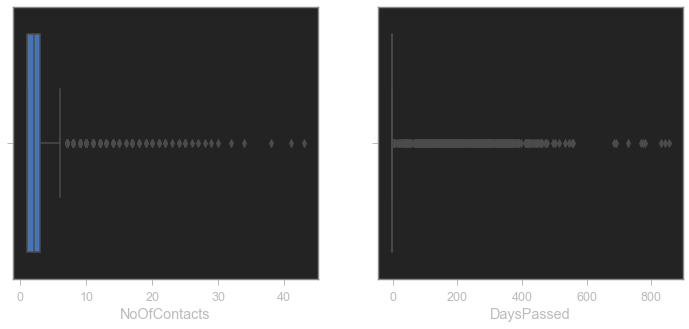

In [28]:
df_describe = df[['Balance','NoOfContacts','DaysPassed']]

fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(df['NoOfContacts'], ax=axes[0])
sns.boxplot(df['DaysPassed'], ax=axes[1])

plt.tight_layout
plt.show()

# There were some outliers in these 3 numerical columns
# in Noof Contact there were some clients were contacted more than 10 times
# in Dayspassed the longest since the last contacted customer reached 800 days.

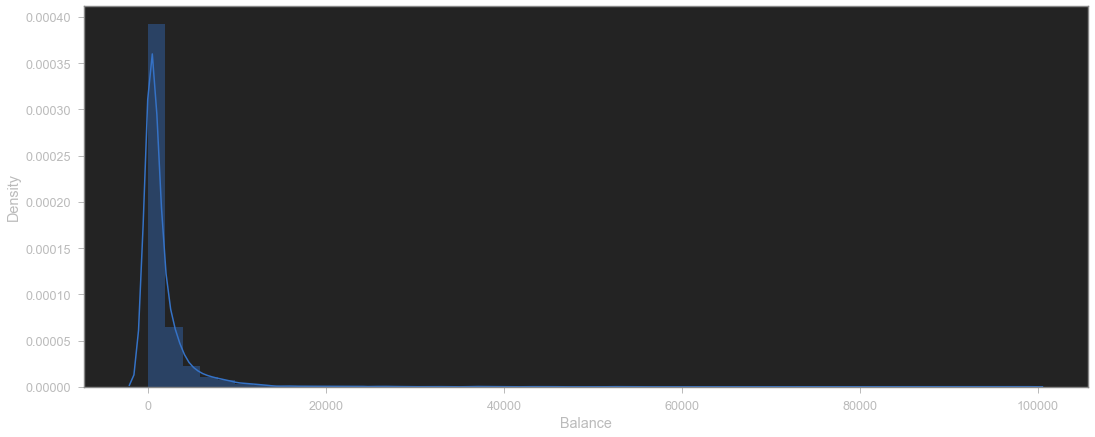

In [29]:
plt.figure(figsize=(18,7))
sns.distplot(df['Balance']);

# On Balance feature, we could see the distributions of the clients balance, its shows a right skewed
# majority of customers balance is on the left side, which indicates the majority of clients balance is under median values.

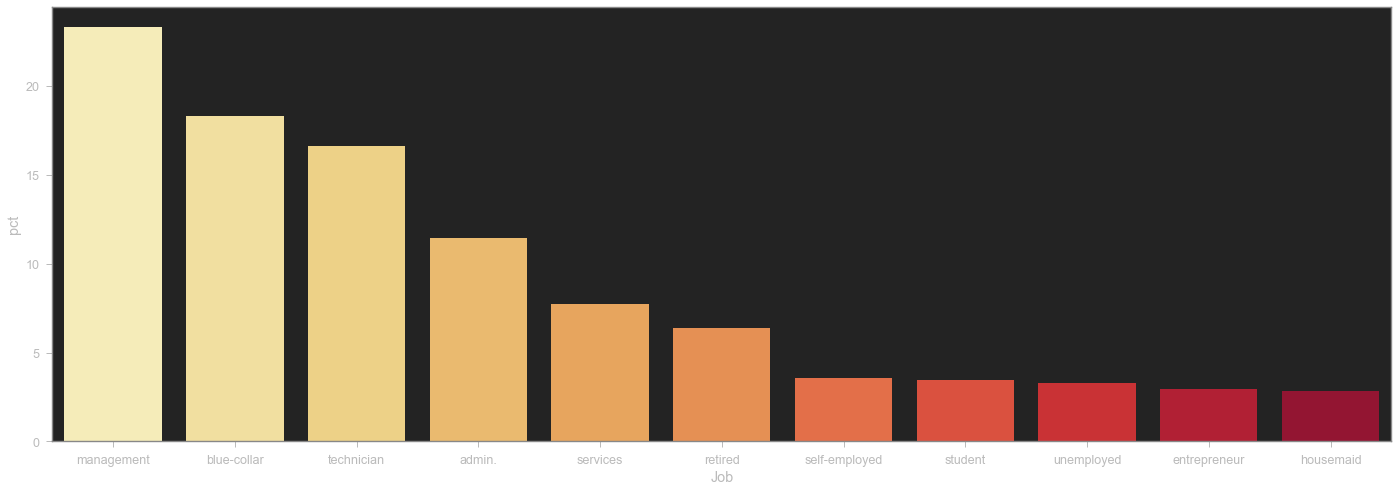

In [30]:

job = (pd.crosstab(index=df['Job'], columns='pct', normalize=True)*100).sort_values('pct',ascending=False)
job = job.reset_index()

plt.figure(figsize=(24,8))
sns.barplot(x='Job',y= 'pct', data=job, palette = 'YlOrRd')
plt.show()

# The majority of customers job are from management followed by Blue Collar and technician

In [31]:
df['Marital'].value_counts(normalize=True)*100

# half of the clients were marriend approximately 57% from population

married     57.804552
single      30.495315
divorced    11.700134
Name: Marital, dtype: float64

In [32]:
df['Education'].value_counts(normalize=True)*100

# the majority of the clients educations are secondary

secondary    52.048193
tertiary     34.190094
primary      13.761714
Name: Education, dtype: float64

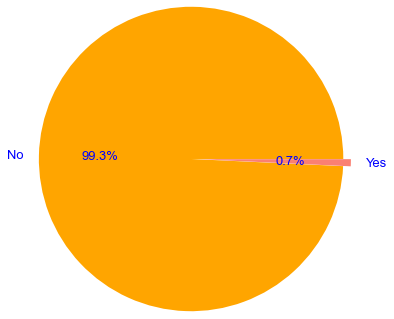

In [33]:
PI = round(df['Default'].value_counts(normalize=True) * 100,2)
x = PI.index
y = PI.values
plt.figure(figsize=(12,5))  
plt.pie(y, colors=['orange','salmon'],labels=['No','Yes'], 
       startangle=0,
        textprops={'size': 13, 'color' : 'blue'},
        autopct="%1.1f%%",
        radius = 1.4,explode=(.02,.05));

plt.show()

- 96.6% of the clients has no credit in default. According to [Source](https://www.investopedia.com/terms/d/default2.asp#:~:text=Default%20is%20the%20failure%20to,avoids%20or%20stops%20making%20payments.) Default is the failure to repay a debt including interest or principal on a loan or security. A default can occur when a borrower is unable to make timely payments, misses payments, or avoids or stops making payments.
- It means the majority of the clients never failed to repay a debt

In [34]:
df['HHInsurance'].value_counts(normalize=True)*100

# Clients with household insured and not are distributed evenly 51% insured and 49% not insured

0    52.610442
1    47.389558
Name: HHInsurance, dtype: float64

In [35]:
df['CarLoan'].value_counts(normalize=True)*100

# 87% of the clients doesnt get loan for a car

0    87.89826
1    12.10174
Name: CarLoan, dtype: float64

In [36]:
df['Communication'].value_counts(normalize=True)*100

# 93% of clients were contacted through a cellular phone

cellular     93.092369
telephone     6.907631
Name: Communication, dtype: float64

In [37]:
df['LastContactMonth'].value_counts(normalize=True)*100

# As we can see clients were contacted mostly on May jun jul and Aug
# which indicates the previous campaign were done massively on end of spring and during summer.

may    24.899598
jul    13.975904
aug    13.895582
jun    11.271754
nov     9.049531
apr     7.871486
feb     6.773762
jan     3.373494
oct     3.105756
sep     2.623829
mar     2.061580
dec     1.097724
Name: LastContactMonth, dtype: float64

In [38]:
df['PrevAttempts'].value_counts(normalize=True)*100

# 76% of client there havent been contected before this campaign
# and only up to 20% of client contacted up to 5 times

0     75.475234
1      8.567604
2      6.398929
3      3.239625
4      2.088353
5      1.579652
6      0.615797
7      0.535475
8      0.481928
10     0.267738
9      0.214190
13     0.107095
19     0.107095
12     0.107095
14     0.080321
11     0.053548
23     0.026774
30     0.026774
58     0.026774
Name: PrevAttempts, dtype: float64

In [39]:
df['CallTime'].value_counts().head(10)

# most call performed to the clients are 2 up to 10 minutes.

2     647
3     528
1     428
4     383
5     272
6     222
7     178
8     148
9     120
10    115
Name: CallTime, dtype: int64

In [40]:
df['CarInsurance'].value_counts(normalize=True)*100

# 60% of clients doesnt insured their car
# it indicates the target columns quite balance

0    58.607764
1    41.392236
Name: CarInsurance, dtype: float64

## MULTIVARIATE ANALYSIS

In [41]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,CallTime
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,Not contacted,825,826,0,1
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,Not contacted,889,892,0,3
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,990,996,1,6
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,Not contacted,726,740,1,14
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,Not contacted,875,878,0,3


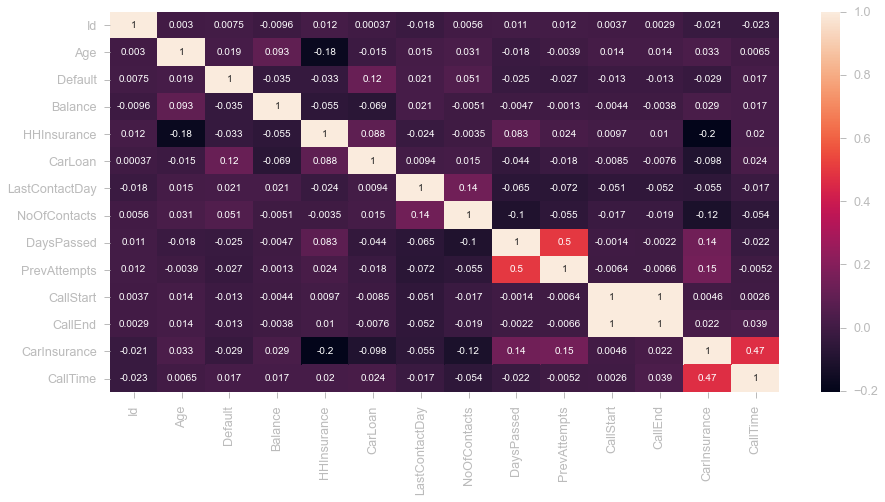

In [42]:
# Check correlation between column target and other numerical target

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

- CallTime, HHinsurance, NoOfContacts, Dayspased and prevattempts shows have a good correlation with column target car Insurance

In [43]:
# Grouping balance for better visulization

bin_blnce = [-1, 500, 1000, 1500, 2000,df['Balance'].max()]
label_balance = ['up to 500$','up to 1000$', 'up to 1500$', 'up to 2000$','above 2000$']
df['balanse'] = pd.cut(df['Balance'], bins = bin_blnce, labels = label_balance)

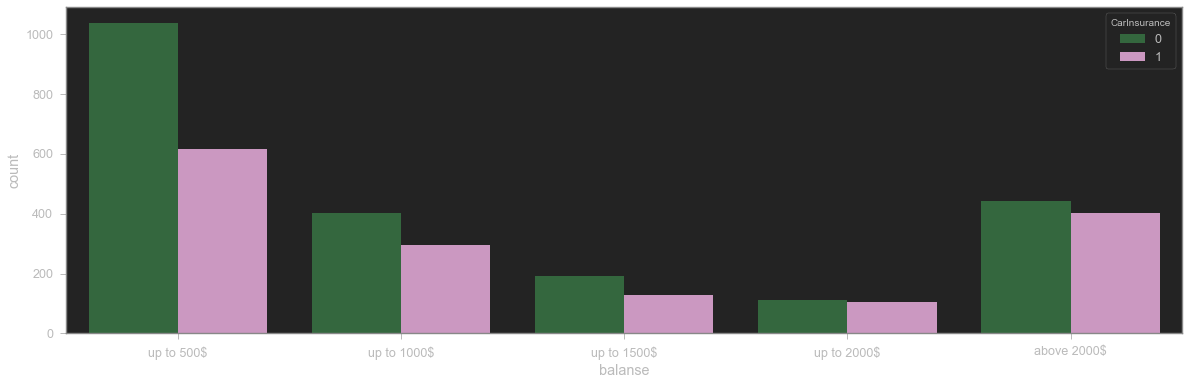

In [44]:
Blc = pd.crosstab(index=df['balanse'], columns='Amount')
Blc = Blc.reset_index()

plt.figure(figsize=(20,6))
sns.countplot(x='balanse',hue='CarInsurance',data=df, palette = 'cubehelix')
plt.show()

# The majorit of clients were in 0-500$ balance in their account
# the amount of customer who agreed to get insurance mostly in up to 500$ and up to 2,000$

In [45]:
pd.crosstab(index=df['HHInsurance'], columns=df['CarInsurance'], normalize='index')*100

# Half of the Customer who doesnt insured their Household are more likely to get car insurance, as seen below 51% of them are decided to get car Insurance
# Meanwhile the customer who insured their household are only 31% of them get the car insurance

CarInsurance,0,1
HHInsurance,,
0,49.058524,50.941476
1,69.209040,30.790960


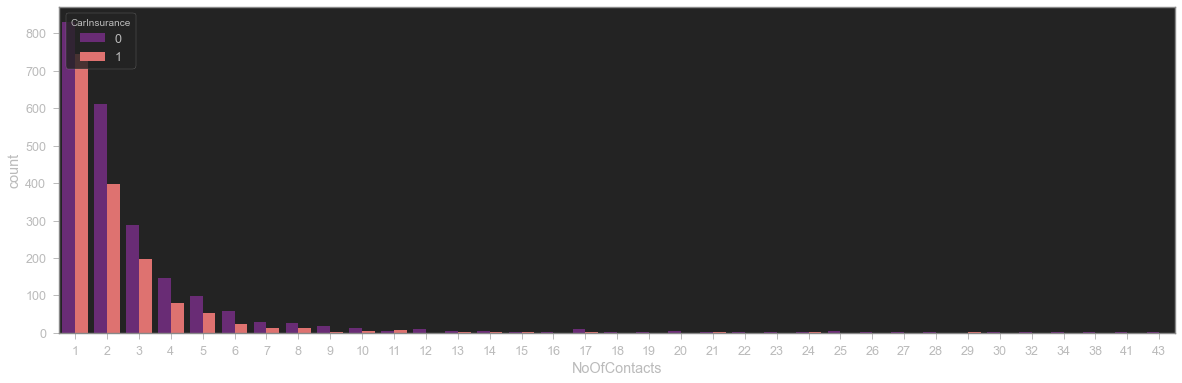

In [46]:
nocon = pd.crosstab(index=df['NoOfContacts'], columns='Amount')
nocon = nocon.reset_index()

plt.figure(figsize=(20,6))
sns.countplot(x='NoOfContacts',hue='CarInsurance',data=df, palette = 'magma')
plt.show()

# Data shows that Customers who contacted more that 8 times for 1 campaign are more unlikely to get insurance
# while the customer who first time contacted for the campaign has the highest rate to get insurance car

In [67]:
pd.crosstab(index=df['DaysPassed'], columns=df['CarInsurance'], margins=True).sort_values('All',ascending=False)[1:11]

# the majority of customers havent been previously contacted 
# while the top 9 customer last contacted are above 90 days.

CarInsurance,0,1,All
DaysPassed,,,
-1,1821,998,2819
92,4,33,37
182,9,24,33
183,4,20,24
91,2,21,23
95,1,15,16
93,2,14,16
94,3,11,14
181,2,11,13


In [48]:
(pd.crosstab(index=df['Job'], columns=df['CarInsurance'], normalize='index')*100).sort_values(1,ascending=False)

# The customers occupation as a student surprisingly has the beest response rate with 67% of them are decide to get the car Insurance
# unemployed and retired occupation followed with 59% yes response rate.
# then followed by management and admin with 45% and 40%
# The top 3 response rate are coming from customers who "didnt have a job" type of occupation.

CarInsurance,0,1
Job,,
student,33.076923,66.923077
unemployed,40.163934,59.836066
retired,40.336134,59.663866
management,54.764638,45.235362
admin.,59.112150,40.887850
technician,59.967846,40.032154
self-employed,61.654135,38.345865
services,63.793103,36.206897
housemaid,64.761905,35.238095


In [49]:
(pd.crosstab(index=df['Marital'], columns=df['CarInsurance'], normalize='index')*100).sort_values(1,ascending=False)

# Customer who is single and divorced are more likely to get Car Insurance compared to the married customer

CarInsurance,0,1
Marital,,
single,52.677788,47.322212
divorced,55.148741,44.851259
married,62.436313,37.563687


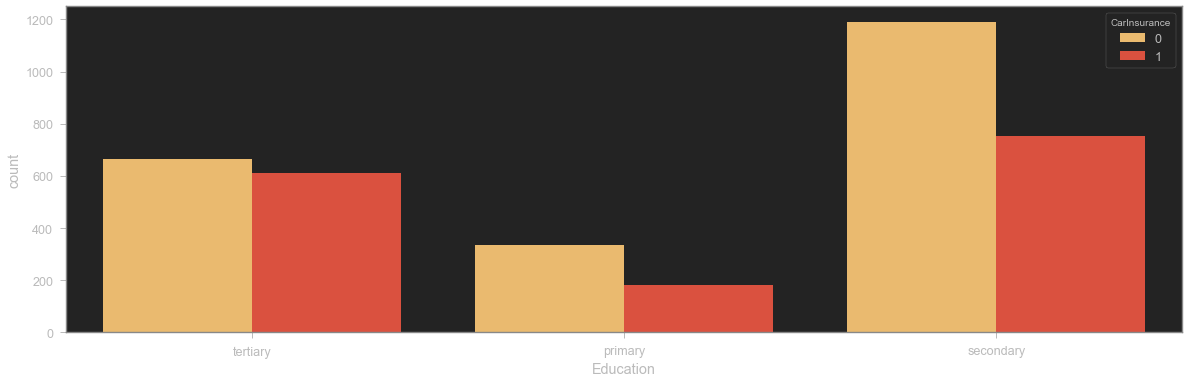

In [50]:
Edu = pd.crosstab(index=df['Education'], columns='Amount')
Edu = Edu.reset_index()

plt.figure(figsize=(20,6))
sns.countplot(x='Education',hue='CarInsurance',data=df, palette = 'YlOrRd')
plt.show()

# Customer who in secondary education are the highest amount of getting car insurance but from the yes rate, 
# customers with tertiary education are more likely to get insurance with a 48% rate

In [51]:
(pd.crosstab(index=df['Communication'], columns=df['CarInsurance'], normalize='index')*100).sort_values(1,ascending=False)

# While 93% of customer approached by cellular, but the telephone successrate are better with 47%.

CarInsurance,0,1
Communication,,
telephone,53.100775,46.899225
cellular,59.016393,40.983607


In [52]:
(pd.crosstab(index=df['LastContactMonth'], columns=df['CarInsurance'], normalize='index')*100).sort_values(1,ascending=False)

# As we know on Univariate analysis, the contacts by the company mostly performed on May to Aug, but from this data we can see that the most effective or success rate of contact were not on those months.
# Dec, Sep and Mar are the most effective month with 80% - 83% success rate!
# Followed by oct 77%, apr 52% and feb 51% success rate.

CarInsurance,0,1
LastContactMonth,,
dec,17.073171,82.926829
sep,17.346939,82.653061
mar,19.480519,80.519481
oct,23.275862,76.724138
apr,47.959184,52.040816
feb,48.616601,51.383399
nov,60.946746,39.053254
jun,61.045131,38.954869
jan,62.698413,37.301587


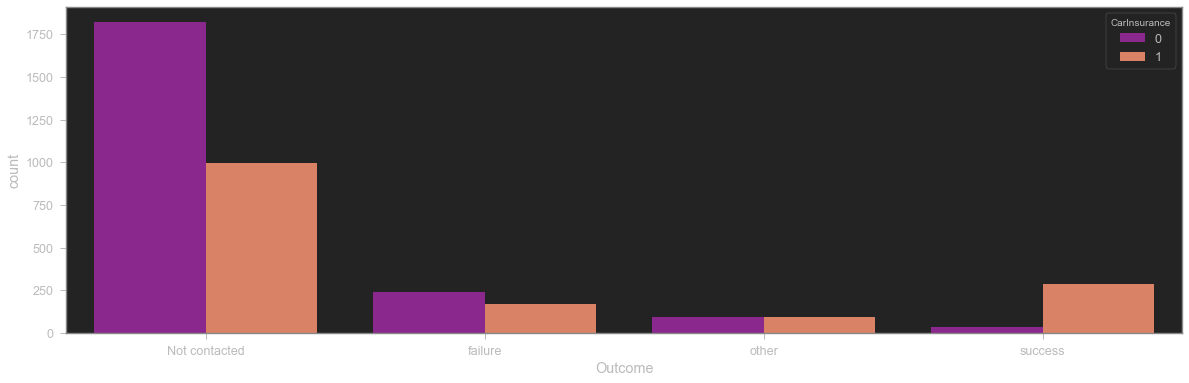

In [53]:
Out = pd.crosstab(index=df['Outcome'], columns='Amount')
Out = Out.reset_index()

plt.figure(figsize=(20,6))
sns.countplot(x='Outcome',hue='CarInsurance',data=df, palette = 'plasma')
plt.show()

# As seen below, customer with success outcome on previous marketing campagin are more likely to get the car Insurance.
# Even compared to the failure attempts on Previous campaing, the not contacted customers on previous marketing campagin has the lowest success rate percentage to get car insurance.

In [54]:
(pd.crosstab(index=df['CallTime'], columns=df['CarInsurance'], normalize='index')*100).sort_values(1,ascending=False)

# From the data seen below, we could see that the longer the CallTime the higher the success rate.
# Though there are some exception on the minutes 36 and 51 because the number of times performed only 1 and its a no response or customer didnt get the car insurance

CarInsurance,0,1
CallTime,,
39,0.000000,100.000000
40,0.000000,100.000000
37,0.000000,100.000000
46,0.000000,100.000000
35,0.000000,100.000000
34,0.000000,100.000000
33,0.000000,100.000000
31,0.000000,100.000000
29,0.000000,100.000000


In [56]:
# df.to_csv('InsuranceClean.csv',index=False)